In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

exp = 'exp6'
with open(exp + '_unlabeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['lipton-excess'] = df['lipton'] - df['bayes_error']
df['oracle-excess'] = df['oracle'] - df['bayes_error']

measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        25      100      0.181925  0.166058      0.078848  0.049349
1        50       10      0.231201  0.156459      0.091613  0.047220
2        50       20      0.177867  0.149274      0.079398  0.050909
3        50       40      0.159803  0.130429      0.097386  0.055494
4        50       80      0.189785  0.139953      0.099377  0.055216
5        50      100      0.150612  0.127874      0.092527  0.047594
6        50      160      0.160758  0.149172      0.076758  0.051515
7        50      320      0.157085  0.132271      0.089451  0.054735
8        50      640      0.148851  0.132075      0.093103  0.049541
9        50     1280      0.127808  0.112986      0.082124  0.045097
10       50     2560      0.144161  0.128415      0.087422  0.049663
11       50     5120      0.157337  0.131310      0.087754  0.048833
12      100      100      0.169584  0.122822      0.100116  0.053571
13      200      100      0.126527  0.093930      0.089444  0.047842
14      400      100      0.096277  0.079223      0.077215  0.056778
15      800      100      0.081655  0.060455      0.069716  0.046538
16     1600      100      0.072008  0.068694      0.059590  0.051382
17     3200      100      0.068459  0.079413      0.045448  0.050482
18     6400      100      0.047730  0.073329      0.037524  0.043921
19    12800      100      0.050349  0.078512      0.020451  0.036705

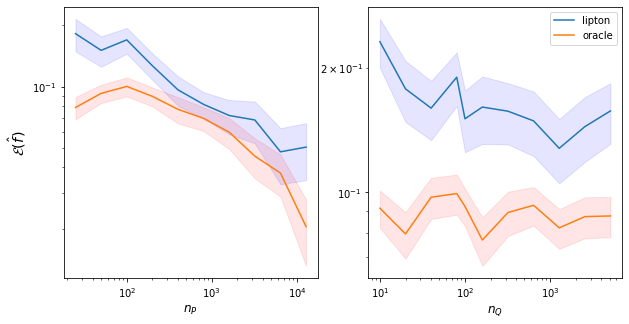

In [5]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [2]:
with open(exp + '_labeled.out') as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)

df['classical-excess'] = df['classical'] - df['bayes_error']
df['labeled-excess'] = df['labeled'] - df['bayes_error']

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        50      150         0.067809  0.050904       0.067102  0.049354
1        50      350         0.057901  0.044509       0.055401  0.045177
2        50      750         0.045981  0.049987       0.046083  0.049077
3        50     1550         0.044614  0.044314       0.044514  0.044798
4        50     3150         0.036513  0.043787       0.035806  0.045974
5        50     6350         0.026335  0.044920       0.025407  0.044378
6        50    12750         0.029958  0.046402       0.030766  0.046212
7       150       50         0.059232  0.050325       0.086242  0.045565
8       350       50         0.058471  0.049926       0.080493  0.044032
9       750       50         0.063162  0.048609       0.074651  0.051371
10     1550       50         0.047815  0.046368       0.046615  0.043393
11     3150       50         0.059211  0.046508       0.045670  0.039740
12     6350       50         0.067092  0.051632       0.038827  0.043882
13    12750       50         0.057735  0.049662       0.027327  0.043173

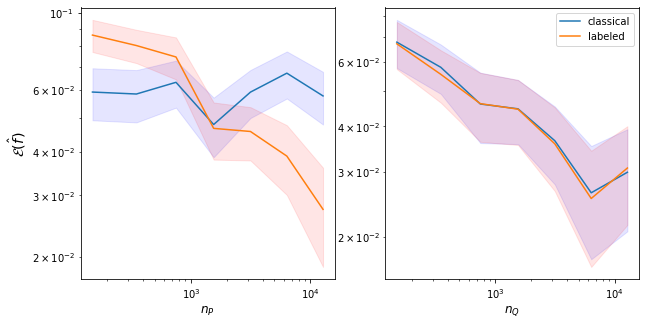

In [3]:
result1 = result.loc[result['n_target'] == 50]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 50]

n, mean, std = result2['n_target'], result2['classical-excess']['mean'], result2['classical-excess']['std']
mean_o, std_o = result2['labeled-excess']['mean'], result2['labeled-excess']['std']
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('classical', 'labeled'), loc='middle left')
plt.show()